## Building Autoencoders

1. Autoencoders are data-specific, which means that they will only be able to compress data similar to what they have been trained on. An autoencoder trained on pictures of faces would do a rather poor job of compressing pictures of trees, because the features it would learn would be face-specific.

2. Autoencoders are lossy, which means that the decompressed outputs will be degraded compared to the original inputs (similar to MP3 or JPEG compression). This differs from lossless arithmetic compression.

3. Autoencoders are learned automatically from data examples, which is a useful property: it means that it is easy to train specialized instances of the algorithm that will perform well on a specific type of input. It doesn't require any new engineering, **just appropriate training data**.

To build an autoencoder, you need three things: 
* Encoding function
* Decoding function
* Distance function

Distance function is between the amount of information loss between the compressed representation of your data and the decompressed representation (i.e. a "loss" function). 

The encoder and decoder will be chosen to be parametric functions (typically neural networks), and to be differentiable with respect to the distance function, so **the parameters of the encoding/decoding functions can be optimize to minimize the reconstruction loss**, using **Stochastic Gradient Descent**.

#### Caveats

* Autoencoders are data-specific, which makes them generally impractical for real-world data compression problems: you can only use them on data that is similar to what they were trained on, and making them more general thus requires lots of training data.

#### Usage Areas of AutoEncoders
* Data denosing
* Dimensionality reduction for data visualization

In [ ]:
import keras
import numpy as np
from keras import layers
from keras import regularizers
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
# This is the size of our encoded representations
encoding_dim = 32

input_img = keras.Input(shape=(784,))

encoded = layers.Dense(encoding_dim, activation='relu')(input_img) # encoded representation of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)   # Lossy reconstruction of the input

autoencoder = keras.Model(input_img, decoded)  #  This model maps an input to its reconstruction
encoder = keras.Model(input_img, encoded)  # This model maps an input to its encoded representation

encoded_input = keras.Input(shape=(encoding_dim,))  # This is our encoded (32-dimensional) input
decoder_layer = autoencoder.layers[-1]   # Retrieve the last layer of the autoencoder model

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))  # Create the decoder model

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) # np.prod: Return the product of array elements over a given axis. 60000, 28, 28 to 60000, 784
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
# After 50 epochs, the autoencoder seems to reach a stable train/validation loss value of about 0.09. 

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


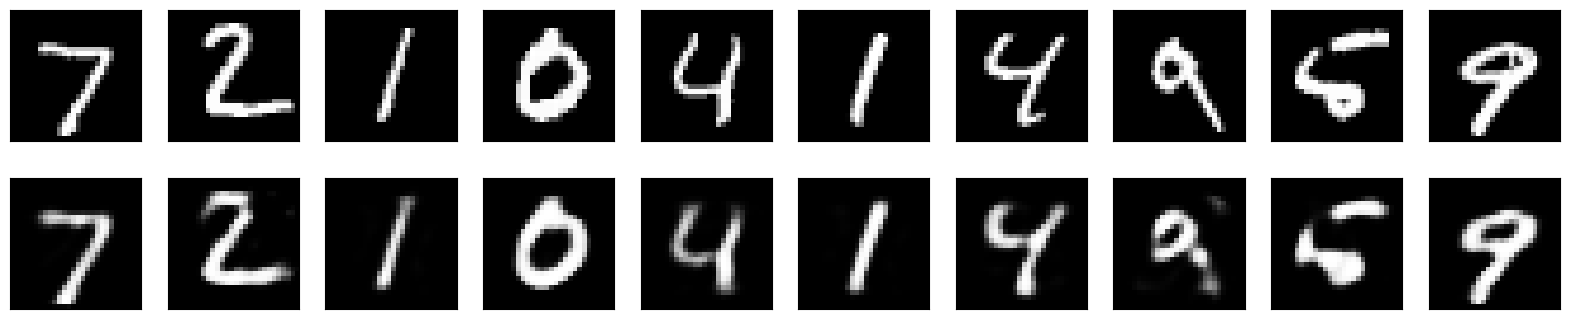

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Reference

https://blog.keras.io/building-autoencoders-in-keras.html